# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1. Is the distribution of body temperature normal?

### First, explore the dataset

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Plot the histogram of the Temperature data 

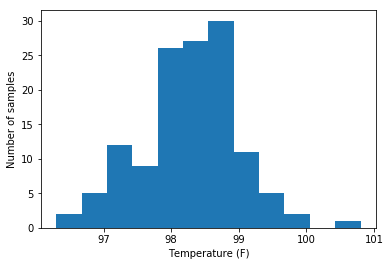

In [6]:
_ = plt.hist(df.temperature, bins=12)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Number of samples')
_ = plt.show()

The histogram looks like a normal distribution (bell curve), a bit skewed to the left.

### Plot the CDF of the Temperature data and of the normal distribution

Get the mean and standard deviation of the sample to generate the normal distribution

In [7]:
m = df.temperature.mean()
s = df.temperature.std()
n = df.temperature.count()

Plot the Cumulative Distribution Function

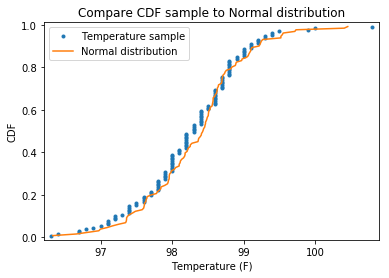

In [8]:
xd = np.sort(df.temperature)
xn = np.random.normal(m,s,size=n)
xn = np.sort(xn)
y = np.arange(1,n+1)/(n+1)
_ = plt.plot(xd, y, marker='.', linestyle='none')
_ = plt.plot(xn, y)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(('Temperature sample','Normal distribution'))
_ = plt.title('Compare CDF sample to Normal distribution')
plt.margins(0.02)
_ = plt.show()

The temperature sample is very close to the normal distribution.

### Plot the quantile-quantile of the Temperature data vs. the normal distribution

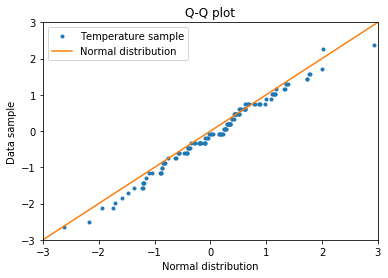

In [9]:
_ = plt.plot((xn-m)/s, (xd-m)/s , marker='.', linestyle='none')
_ = plt.plot([-3,3],[-3,3])
_ = plt.xlim(-3, 3)
_ = plt.ylim(-3, 3)
_ = plt.xlabel('Normal distribution')
_ = plt.ylabel('Data sample')
_ = plt.legend(('Temperature sample','Normal distribution'))
_ = plt.title('Q-Q plot')
_ = plt.show()

Here again, the Temperature data is close to the normal distribution.

### In conclusion: Yes, the distribution of body temperature is normal.

# 2. Is the sample size large? Are the observations independent?

The sample size is 130.
### Yes, the sample size is large because it's over 30.
### Yes, the observations are independent, because the sample size is less than 10% of the population.

# 3. Is the true population mean really 98.6 degrees F?

### First, try bootstrap hypothesis test

The null hypothesis is : the mean is 98.6 degrees.

The alternate hypothesis is: the mean is different than 98.6

This is a 2 tails problem, because in the alternate hypothesis, the temperature mean can be either higher or lower.

I set the significance level at 0.05 (5%)

In [10]:
# Shift the data to center it on the hypothesis mean 
MU = 98.6
t_shift = df.temperature - m + MU

# Initialize bs_replicate
size=1000
bs_replicate = np.empty(size)

# bootstrap loop : Draw 1000 times a sample of 130 temperatures and calculate the mean (bootstrap replicate)
for i in range(size):
    bs_sample = np.empty(n)
    bs_sample = np.random.choice(t_shift, size=n)
    bs_replicate[i] = np.mean(bs_sample)
    
# compute p_value = (proportion of replicates < m) *2 (2 tails problem)
p_value_bs = 2*np.sum(bs_replicate<m)/size

print('p_value of null hypothesis =', p_value_bs)

p_value of null hypothesis = 0.0


p_value is less than the significance level, so I reject the null hypothesis that the population mean temperature is 98.6 degrees.

### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

I will use a one-sample test because the null hypothesis is: my sample mean value is not different from the theoretical value.

I would use a two-sample test if the null hypothesis was to test the homogeneity of 2 samples.

Because we don't have the real standard deviation of the population mean, we approximate it with the sample standard deviation. 

To get the p_value, we need to get the cumulative normal distribution value for $z$ score, and we multiply it by 2 because it's a 2 tails problem.

In [11]:
z_score = (m-MU)/(s/np.sqrt(n))
p_value_z = 2*stats.norm.cdf(z_score)
print('z_score = ', z_score)
print('p_value(z score) = ', p_value_z)

z_score =  -5.45482329236
p_value(z score) =  4.90215701411e-08


p_value is under the significance level, so I reject the null hypothesis that the population mean is 98.6 degrees.

### In this situation, is it appropriate to use the  $t$  or  $z$  statistic?

Although we don't know the standard deviation of the population, because the sample size is larger than 30, we can consider that the standard deviation of the sample is a good estimation of the standard deviation of the population.

So I can use $z$ statistic.

### Now try using the other test. How is the result be different? Why?

In [12]:
t_statistic, p_value_t = stats.ttest_1samp(df.temperature, MU)

print('t_statistic = ', t_statistic)
print('p_value(t stat) = ', p_value_t)


t_statistic =  -5.45482329236
p_value(t stat) =  2.41063204156e-07


The p_value is higher with the $t$ distribution because the tails of the $t$ distribution are thicker than the normal distribution.

However, the conclusion is the same. p_value is under the significance level, I reject the null hypothesis that the population mean is 98.6 degrees.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [13]:
t10 = np.random.choice(df.temperature,10)

z_score = (np.mean(t10)-MU)/(np.std(t10)/np.sqrt(10))
p_value_z = 2*stats.norm.cdf(z_score)
print('z_score = ', z_score)
print('p_value(z score) = ', p_value_z)


t_statistic, p_value_t = stats.ttest_1samp(t10, MU)

print('t_statistic = ', t_statistic)
print('p_value(t stat) = ', p_value_t)


z_score =  -5.01793191649
p_value(z score) =  5.2230679082e-07
t_statistic =  -4.76042819993
p_value(t stat) =  0.00102905361155


### Which one is the correct one to use?

Because the sample size is small, the sample standard deviation is not a good estimation of the real population standard deviation. In this case, we should use the $t$ statistic.

### What do you notice? What does this tell you about the difference in application of the  $t$  and  $z$  statistic?

Because the sample size is small (less than 30), we should check if this sample is normal.

The tails of the $t$ distribution are thicker than the tails of the normal distribution to "compensate" the approximation of the standard deviation.
With a small sample size, it's more accurate to use the $t$ distribution.

When the sample size is big, the degree of freedom is high, and the $t$ distribution becomes closer and closer to the normal distribution.
With a large sample size (>30), we can use the $z$ statistic.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?
### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

I set the significance level at 0.05

In [14]:
# calculate z_score for 95% confidence interval
z_score = stats.norm.interval(0.95)
print('±z_score = ', z_score)

±z_score =  (-1.959963984540054, 1.959963984540054)


In [15]:
# calculate margin of error for 95% confidence interval
mel , meh = stats.norm.interval(0.95, loc=m, scale=s)
print('The Margin of Error for temperature is ± {:f} degrees'.format(meh-m))
print('Temperatures below {:f} or over {:f} are abnormal with 95% confidence interval'.format(mel,meh))

The Margin of Error for temperature is ± 1.437013 degrees
Temperatures below 96.812218 or over 99.686243 are abnormal with 95% confidence interval


In [16]:
# Initialize bs_replicate
# 2 replicates for each bootstrap sample: the 95% interval of normal temperature

size=1000
bs_replicate_li = np.empty(size)
bs_replicate_hi = np.empty(size)

# bootstrap loop
for i in range(size):
    bs_sample = np.empty(n)
    bs_sample = np.random.choice(df.temperature, size=n)
    bs_replicate_li[i], bs_replicate_hi[i] = stats.norm.interval(0.95, loc=np.mean(bs_sample), scale=np.std(bs_sample))
    
# Calculate the 95% confidence interval
ci_li = np.percentile(bs_replicate_li,[5])
ci_hi = np.percentile(bs_replicate_hi,[95])

print('Temperatures below {:f} or over {:f} are abnormal with 95% confidence interval'.format(ci_li[0],ci_hi[0]))

Temperatures below 96.617879 or over 99.872143 are abnormal with 95% confidence interval


# 6. Is there a significant difference between males and females in normal temperature?
### What testing approach did you use and why?

The null hypothesis is homogeneity: male and female have the same temperature, in other words, the difference of means is 0.

The alternative hypothesis is : the difference of means is not 0.

I set the significance level at 0.05.

In [17]:
# First, split the dataset
tf = df.temperature[df.gender == 'F']
tm = df.temperature[df.gender == 'M']

print('Number of female values =', len(tf))
print('Number of male values =', len(tm))


Number of female values = 65
Number of male values = 65


The number of samples for each category is large, so the distributions can be considered normal.

I can use $z$ score.

Calculate the $z$ score for the difference of sample means

In [18]:
z_score = (np.mean(tf)-np.mean(tm)) / np.sqrt((np.var(tf)/len(tf)) + (np.var(tm)/len(tm)))
if z_score>0:
    z_score=-z_score
print('z_score = ', z_score)

p_value = 2* stats.norm.cdf(z_score)
print('p_value = ', p_value)

z_score =  -2.30322028919
p_value =  0.0212664518301


p_value is smaller than the significance level, so I can reject the null hypothesis that male and female have the same temperature.

Let's try the $t$ statistic:

ttest_ind tests the null hypothesis that 2 independent samples have the same mean.

In [19]:
stats.ttest_ind(tf, tm, equal_var=False)

Ttest_indResult(statistic=2.2854345381656112, pvalue=0.023938264182934196)

p_value is smaller than the significance level, so I can reject the null hypothesis that male and female have the same temperature.

### Write a story with your conclusion in the context of the original problem.

Ask anyone what is the normal body temperature, and they will tell you 98.6 degrees. But we would like to know if this value is true, what is an "abnormal" temperature, and if there is a difference between men and women temperatures.
Let's take a random sample of 65 women temperatures and 65 men temperatures.

The temperature distribution is normal, the samples are random and independent.
So we can use inferential statistics.

Let's answer our main question: Is the temperature mean 98.6 degrees?
The null hypothesis is: the temperature mean is 98.6
The alternate hypothesis is: the temperature mean is not 98.6
Using different techniques, I found that under the null hypothesis, the probability of having my sample mean is very low. So I reject the null hypothesis, the temperature mean is not 98.6 degrees.

What temperature should be considered as "abnormal"?
95% of the sample temperatures are between 96.8 and 99.7 degrees.
With a 95% confidence interval, the lowest "normal" temperature is 96.6 degrees and the highest "normal" temperature is 99.9 degrees. Temperatures below 96.6 degrees and above 99.9 degrees are "abnormal"

Is there a temperature difference between men and women?
The null hypothesis is: the temperature mean is the same
The alternate hypothesis is: the temperature mean is different
Under the null hypothesis, the probability of having my sample mean difference is lower than the significance level. So I reject the null hypothesis, the temperature mean is different for men and women.